In [3]:
"""
        Simple Linear Regression using Tensorflow
        Author--Mitra Nand Mishra
        Date--30-8-17
"""
# import required library

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt


In [5]:
rng=np.random
print(rng)

<module 'numpy.random' from 'F:\\Anaconda\\lib\\site-packages\\numpy\\random\\__init__.py'>


In [6]:
#parameters

learning_rate=0.01
training_epochs=1000
display_step=50

In [23]:
# Training Data

train_x=np.array([2,3.4,4,10,6,7.6,4.7,8.5,9,11.3])
print(train_x)

#length of sample
n_samples = train_x.shape[0]
print(n_samples)

[  2.    3.4   4.   10.    6.    7.6   4.7   8.5   9.   11.3]
10


In [24]:
train_y=np.array([6,7.4,4,13,16,17.6,14.7,18.5,19,1.3])
print(train_y)
print(train_y.shape[0])

[  6.    7.4   4.   13.   16.   17.6  14.7  18.5  19.    1.3]
10


In [25]:
# tf graph input placeholder

X=tf.placeholder("float")
Y=tf.placeholder("float")

In [26]:
# set model weight

W=tf.Variable(rng.random(),name="weight")
b=tf.Variable(rng.random(),name="bias")



In [27]:
# construct a linear model

pred=tf.add(tf.multiply(X,W),b)
pred

<tf.Tensor 'Add_1:0' shape=<unknown> dtype=float32>

In [28]:
# Mean Squared Error

cost=tf.reduce_sum(tf.pow(pred-Y,2))/(2*n_samples)
cost

<tf.Tensor 'truediv:0' shape=<unknown> dtype=float32>

In [31]:
# Gradient Descent
optimizer=tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)
# minimize() knows to modify W and b because Variable objects are trainable
optimizer

<tf.Operation 'GradientDescent_1' type=NoOp>

In [33]:
# Initialize the variable assign their default value

init=tf.global_variables_initializer()
init

<tf.Operation 'init' type=NoOp>

Epoch: 0050 cost= 21.923130035 W= 1.27182 b= 1.61706
Epoch: 0100 cost= 21.309150696 W= 1.2029 b= 2.18641
Epoch: 0150 cost= 20.790340424 W= 1.13937 b= 2.71123
Epoch: 0200 cost= 20.352169037 W= 1.0808 b= 3.19501
Epoch: 0250 cost= 19.982309341 W= 1.02682 b= 3.64096
Epoch: 0300 cost= 19.670297623 W= 0.977053 b= 4.05204
Epoch: 0350 cost= 19.407268524 W= 0.931182 b= 4.43097
Epoch: 0400 cost= 19.185693741 W= 0.888897 b= 4.78027
Epoch: 0450 cost= 18.999195099 W= 0.849918 b= 5.10226
Epoch: 0500 cost= 18.842361450 W= 0.813988 b= 5.39906
Epoch: 0550 cost= 18.710605621 W= 0.780867 b= 5.67266
Epoch: 0600 cost= 18.600042343 W= 0.750337 b= 5.92486
Epoch: 0650 cost= 18.507381439 W= 0.722194 b= 6.15734
Epoch: 0700 cost= 18.429824829 W= 0.696252 b= 6.37164
Epoch: 0750 cost= 18.365015030 W= 0.672338 b= 6.56918
Epoch: 0800 cost= 18.310947418 W= 0.650294 b= 6.75128
Epoch: 0850 cost= 18.265933990 W= 0.629975 b= 6.91913
Epoch: 0900 cost= 18.228536606 W= 0.611245 b= 7.07385
Epoch: 0950 cost= 18.197549820 W= 0

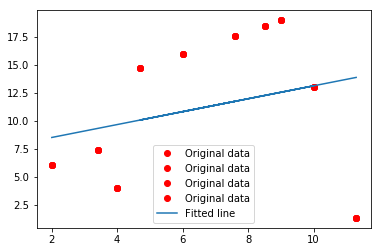

In [44]:
#start Training
with tf.Session() as sess:
    sess.run(init)
    
    # fit all training data
    for epoch in range(training_epochs):
        for(x,y) in zip(train_x,train_y):
            sess.run(optimizer,feed_dict={X:x,Y:y})
            
        # Display log per epochs
        if(epoch+1)%display_step==0:
            c=sess.run(cost,feed_dict={X:train_x,Y:train_y})
            print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), \
                 "W=", sess.run(W), "b=", sess.run(b))
    
    print("optimzations Finished!")
    training_cost=sess.run(cost,feed_dict={X:train_x,Y:train_y})
    print("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')
    # graph display

    plt.plot(train_x,train_y, 'ro', label='Original data')
    plt.plot(train_x, sess.run(W) * train_x + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()